In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/home.csv")
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

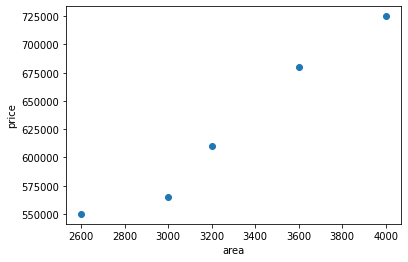

In [ ]:
plt.scatter(data.area,data["price"])
plt.xlabel("area")
plt.ylabel("price")

In [ ]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(data[["area","price"]])
y_predicted

array([1, 1, 1, 0, 0], dtype=int32)

In [ ]:
data["cluster"]=y_predicted
data

,area,price,cluster
0,2600,550000,1
1,3000,565000,1
2,3200,610000,1
3,3600,680000,0
4,4000,725000,0


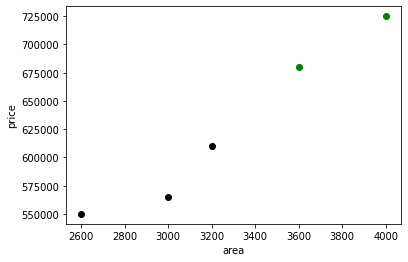

In [ ]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
plt.scatter(data1.area,data1["price"],color="green")
plt.scatter(data2.area,data2["price"],color="black")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

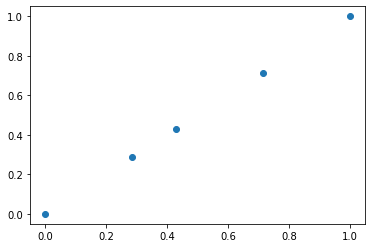

In [ ]:
scaler=MinMaxScaler()
scaler.fit(data[["price"]])
data["price"]=scaler.transform(data[["price"]])

scaler.fit(data[["area"]])
data["area"]=scaler.transform(data[["area"]])
plt.scatter(data.area,data["price"])

In [ ]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(data[["area","price"]])
y_predicted

array([1, 1, 1, 0, 0], dtype=int32)

In [ ]:
data["cluster"]=y_predicted
data

,area,price,cluster
0,0.000000,0.000000,1
1,0.285714,0.285714,1
2,0.428571,0.428571,1
3,0.714286,0.714286,0
4,1.000000,1.000000,0


In [ ]:
km.cluster_centers_

array([[0.85714286, 0.85714286],
       [0.23809524, 0.23809524]])

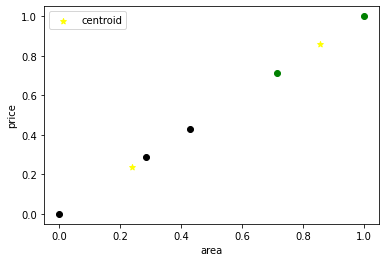

In [ ]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
plt.scatter(data1.area,data1["price"],color="green")
plt.scatter(data2.area,data2["price"],color="black")
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()

In [ ]:
sse=[]
k_rng=range(1,5)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(data[["area","price"]])
  sse.append(km.inertia_)

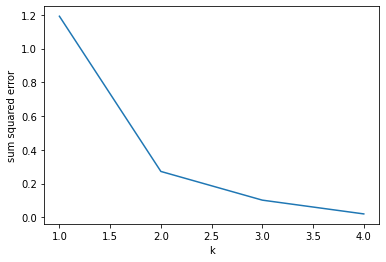

In [ ]:
plt.xlabel("k")
plt.ylabel("sum squared error")
plt.plot(k_rng,sse)